<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="5" color="black"><b>Use Core ML model to predict Boston house prices</b></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr>
   <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/boston/images/boston_houseprice_banner.png" width="600" alt="Icon"> </th>
   </tr>
</table>

This notebook demonstrates how to perform regression analysis using scikit-learn and the watson-machine-learning-client package.

Some familiarity with Python is helpful. This notebook is compatible with Python 3.5.

You will use the sample data set, **sklearn.datasets.load_boston** which is available in scikit-learn, to predict house prices.

## Learning goals

In this notebook, you will learn how to:

-  Load a sample data set from ``scikit-learn``
-  Explore data
-  Prepare data for training and evaluation
-  Create a scikit-learn pipeline
-  Train and evaluate a model
-  Store a model in the Watson Machine Learning (WML) repository
-  Deploy a model as Core ML


## Contents

1.	[Set up the environment](#setup)
2.	[Load and explore data](#load)
3.	[Build a scikit-learn linear regression model](#model)
4.	[Set up the WML instance and save the model in the WML repository](#persistence)
5.	[Deploy the model via Core ML](#scoring)
6.	[Summary and next steps](#summary)

<a id="setup"></a>
## 1. Set up the environment

Before running the code in this notebook, please make sure you have the following requirements:

-  Create a <a href="https://console.ng.bluemix.net/catalog/services/ibm-watson-machine-learning/" target="_blank" rel="noopener no referrer">Watson Machine Learning (WML) Service</a> instance (a free plan is offered and information about how to create the instance can be found <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener no referrer">here</a>)

-  Local python environment configurations:
  + Python 3.5
  + scikit-learn
  + watson-machine-learning-client
  + pixiedust

**Note:** `watson-machine-learning-client` documentation can be found <a href="http://wml-api-pyclient.mybluemix.net/" target="_blank" rel="noopener no referrer">here</a>.  
**Tip**: Run the cells below to install required packages from <a href="https://pypi.python.org/pypi" target="_blank" rel="noopener no referrer">PyPI</a>.

In [1]:
!rm -rf $PIP_BUILD/watson-machine-learning-client

In [ ]:
!pip install --upgrade watson-machine-learning-client

`pixiedust` is an open-source Python helper library that works as an add-on to Jupyter notebooks to improve the user experience of working with data.  
`pixiedust` documentation/code can be found <a href="https://github.com/pixiedust/pixiedust" target="_blank" rel="noopener no referrer">here</a>.  

In [ ]:
!pip install --upgrade pixiedust

<a id="load"></a>
## 2. Load and explore data

The sample data set contains boston house prices. The data set can be found <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/" target="_blank" rel="noopener no referrer">here</a>.

In this section, you will learn how to:
- [2.1 Explore Data](#dataset)  
- [2.2 Check the correlations between predictors and the target](#corr)

### 2.1 Explore data<a id="dataset"></a>

In this subsection, you will perform exploratory data analysis of the boston house prices data set.

In [4]:
import sklearn
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()

Let's check the names of the predictors.

In [5]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Tip:** Run `print(boston_data.DESCR)` to view a detailed description of the data set.

In [6]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Create a pandas DataFrame and display some descriptive statistics.

In [7]:
boston_pd = pd.DataFrame(boston_data.data)
boston_pd.columns = boston_data.feature_names
boston_pd['PRICE'] = boston_data.target

Import ``pixiedust``.

In [8]:
import pixiedust

Pixiedust database opened successfully


You can run the following method if you don't want ``pixiedust`` collecting user statistics.

In [9]:
pixiedust.optOut()

Pixiedust will not collect anonymous install statistics.


In this notebook, ``pixiedust`` will only be used as a dataframe viewer. However, ``pixiedust`` can also be used as a data visualization tool. You can find the details of the visualization functionality of ``pixiedust`` <a href="https://pixiedust.github.io/pixiedust/displayapi.html" target="_blank" rel="noopener no referrer">here</a>.

In [10]:
display(boston_pd)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9
0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.9,9.74,19.0
0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72,24.2
1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.9,34.41,14.4
0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53,29.6
1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.9,4.21,38.7
16.8118,0.0,18.1,0.0,0.7,5.277,98.1,1.4261,24.0,666.0,20.2,396.9,30.81,7.2
3.56868,0.0,18.1,0.0,0.58,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36,23.2


The describe method generates summary statistics of numerical predictors.

In [11]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2.2 Check the correlations between predictors and the target <a id="corr"></a>

In this subsection, you will check the linear correlations between predictors and target by plotting a scatterplot matrix and a heatmap. You need the following packages in order to plot the scatterplot matrix and the heatmap:
* ``matplotlib``
* ``seaborn``

Pearson-type correlations - linear correlations - are excessively affected by outliers, unequal predictors, non-normality, and non-linearities. Hence, when plotting the correlation matrix, it's better to plot the scatterplot matrix first to check the outliers and then plot the heatmap of the correlation matrix.

First, let's plot the scatterplot matrix.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set(style='ticks')

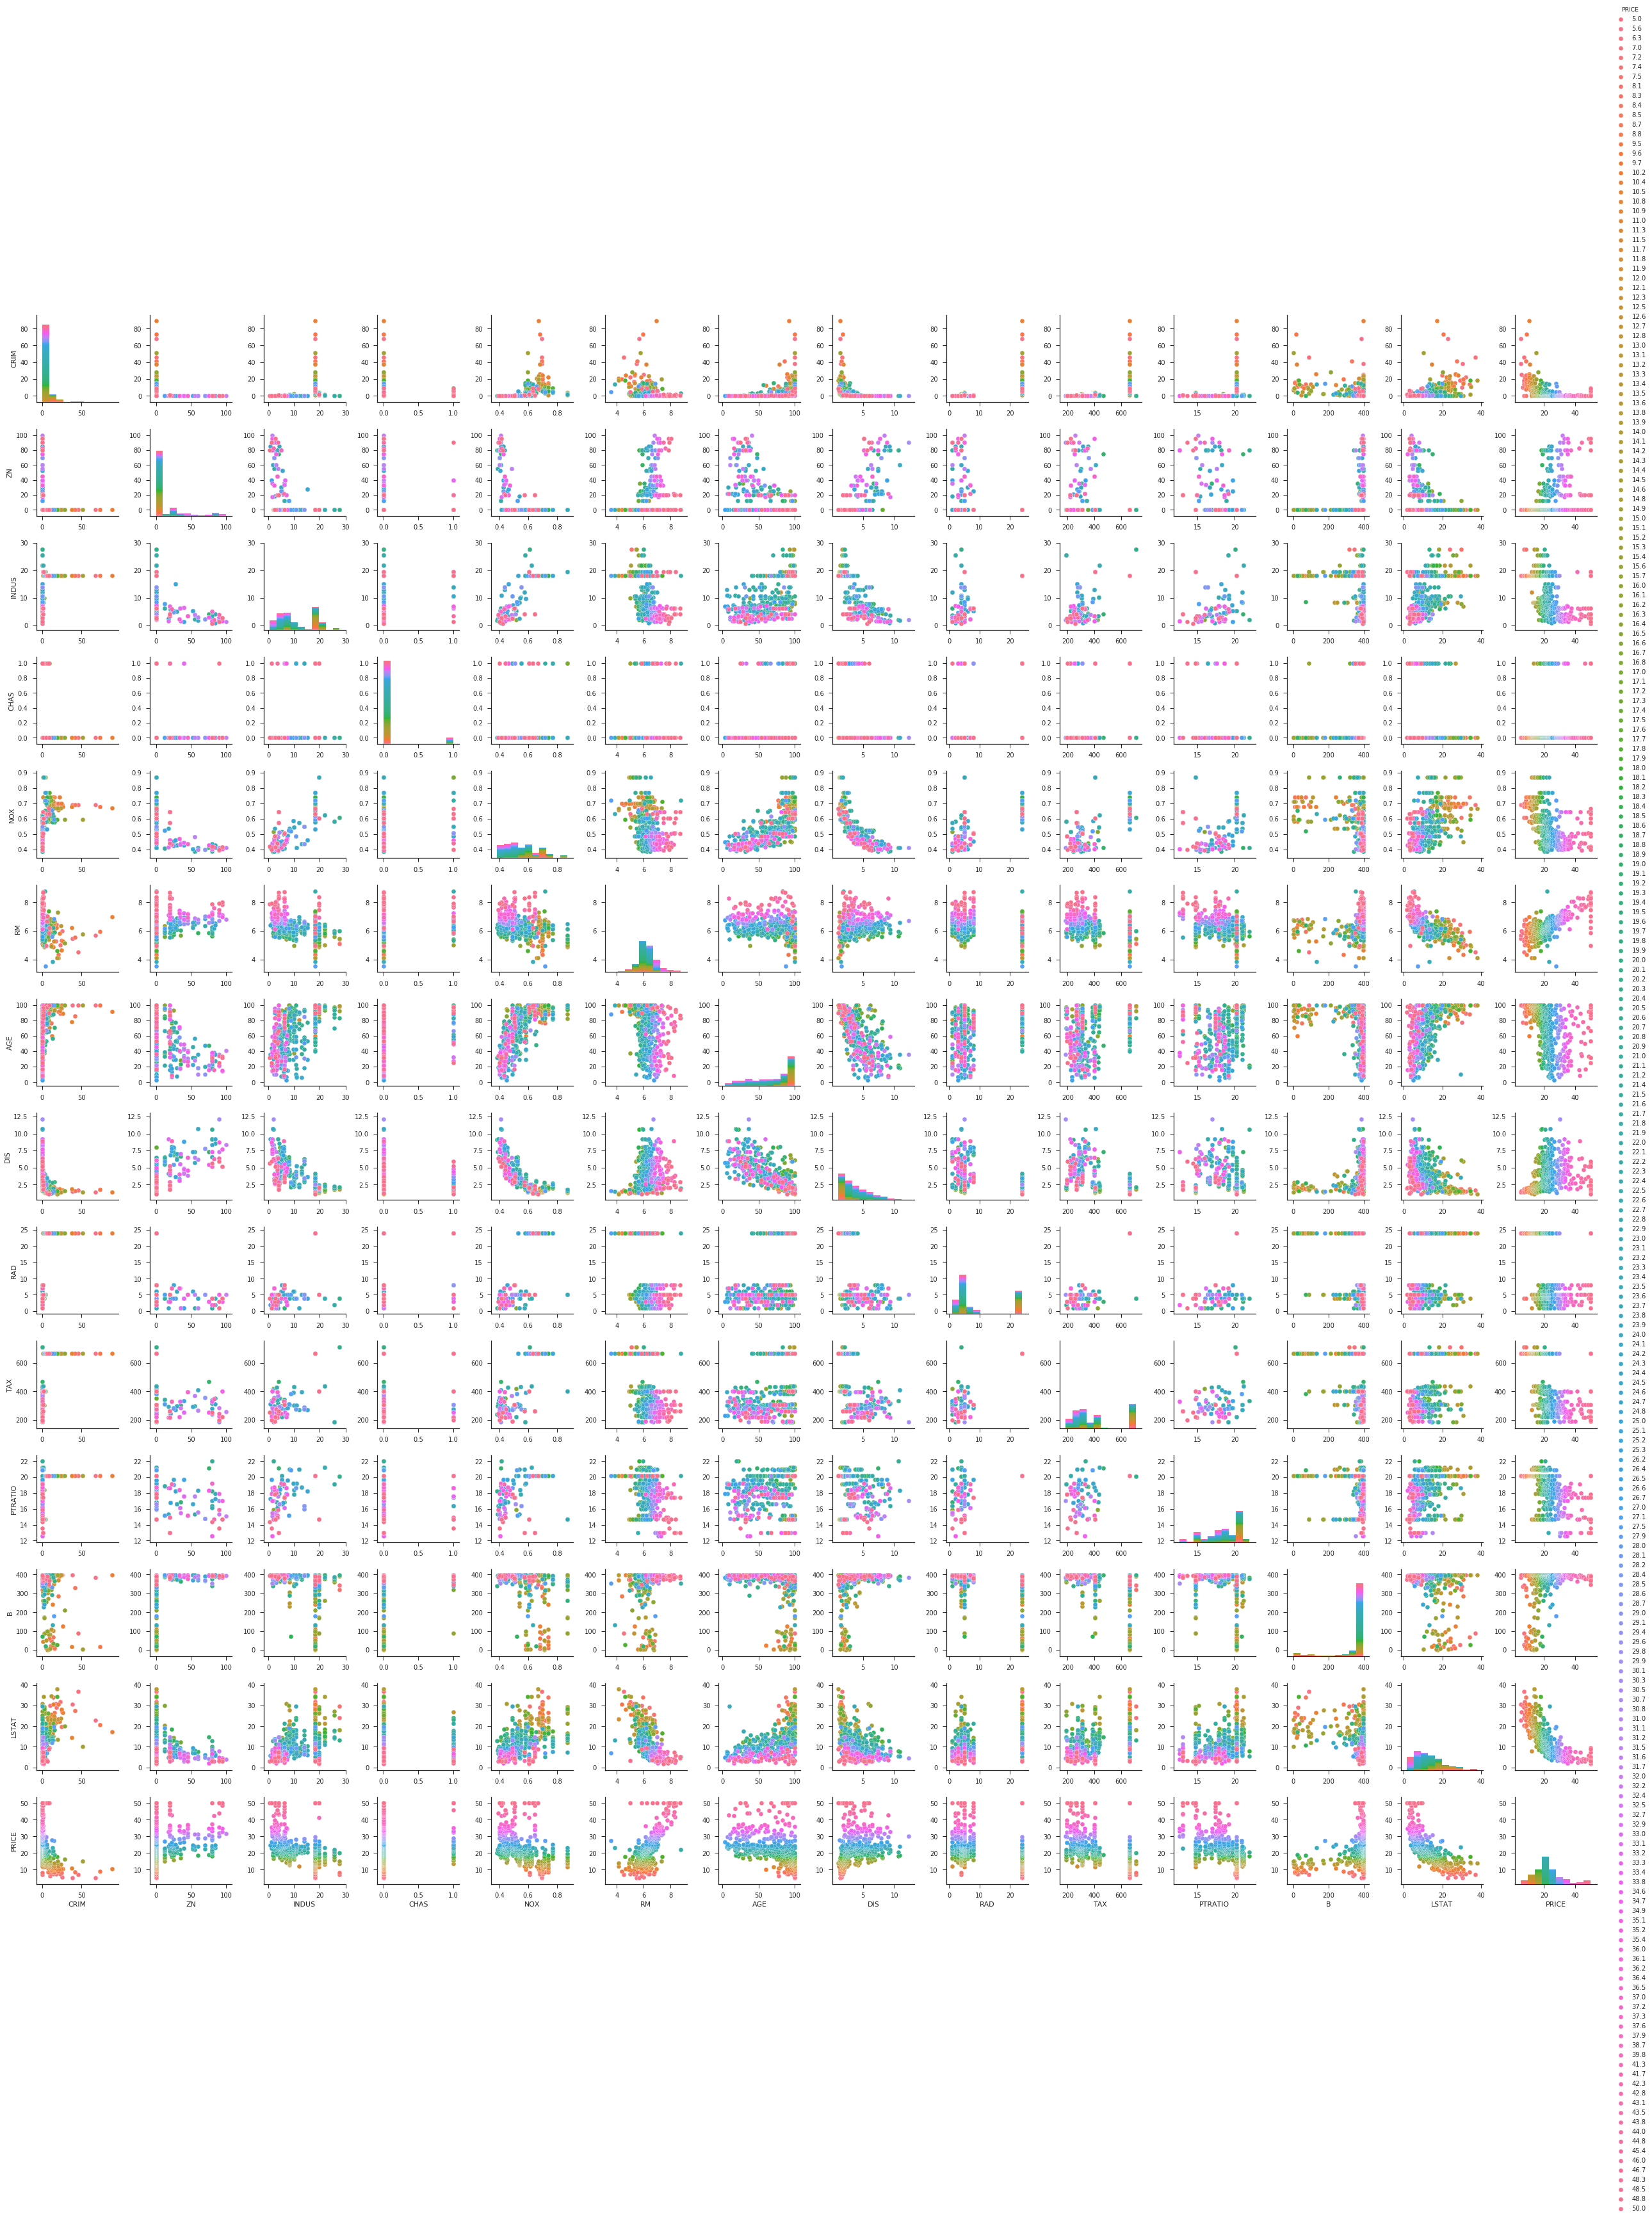

In [14]:
sns.pairplot(boston_pd, hue='PRICE')

Second, the heatmap of correlation matrix.

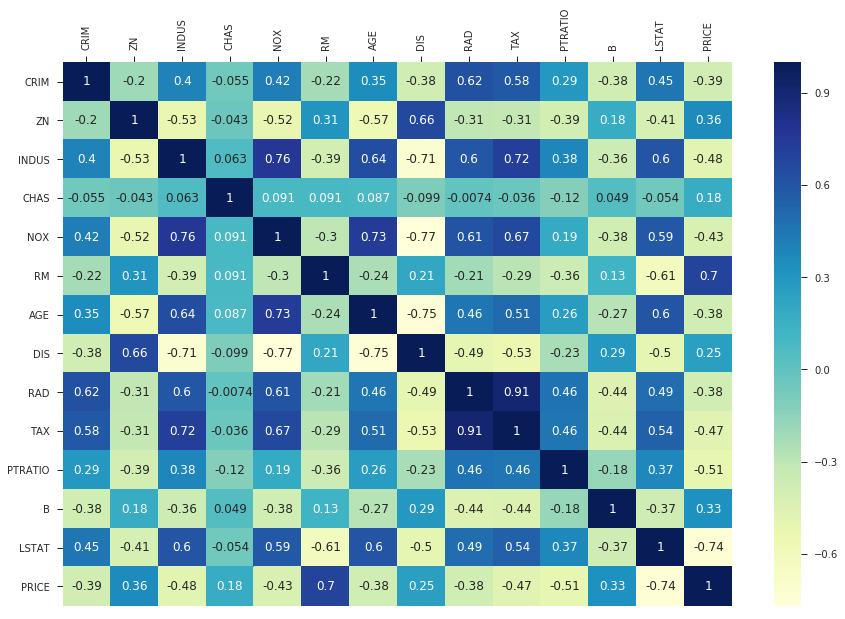

In [15]:
plt.subplots(figsize=(15,10))
hm = sns.heatmap(boston_pd.corr(), annot=True, cmap='YlGnBu')
hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
hm.xaxis.set_ticks_position('top')

From both plots, you can see that the predictor ``RM`` has strong correlation with the target ``PRICE``.

<a id="model"></a>
## 3. Build a scikit-learn linear regression model

In this section, you will learn how to:
- [3.1 Split data](#prep)
- [3.2 Create a scikit-learn pipeline](#pipe)
- [3.3 Train the model](#train)

### 3.1 Split data<a id="prep"></a>

In this subsection, you will split the data set into: 
- Train data set
- Test data set

In [16]:
# Split the data into two data sets.
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

print('Number of training records: ' + str(X_train.shape[0]))
print('Number of training records: ' + str(X_test.shape[0]))

Number of training records: 339
Number of training records: 167


Your data has been successfully split into two data sets: 

-  The train data set, which is the largest group, is used for training.
-  The test data set will be used for model evaluation and is used to test the model.

### 3.2 Create a scikit-learn pipeline<a id="pipe"></a>

In this subsection, you will create a scikit-learn pipeline.

First, import the scikit-learn machine learning packages that are needed in the subsequent steps.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Standardize the features by removing the mean and by scaling to unit variance.

In [18]:
scaler = preprocessing.StandardScaler()

Next, define the regressor you want to use. This notebook uses the Linear Regression model.

In [19]:
lr = LinearRegression()

Build the pipeline. A pipeline consists of a transformer (Standard Scaler) and an estimator (Linear Regression model).

In [20]:
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])

### 3.3 Train the model<a id="train"></a>

Now, you can use the **pipeline** and **train data** you defined previously to train your SVM model.

In [21]:
model = pipeline.fit(X_train, y_train)

Check the model quality.

In [22]:
y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print('MSE: ' + str(mse))

MSE: 28.5413672756


Plot the scatter plot of prices vs. predicted prices.

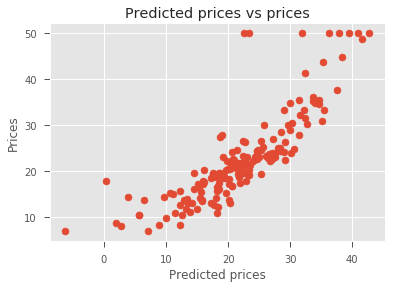

In [23]:
plt.style.use('ggplot')
plt.title('Predicted prices vs prices')
plt.ylabel('Prices')
plt.xlabel('Predicted prices')
plot = plt.scatter(y_pred, y_test)

**Note:** You can tune your model to achieve better accuracy. To keep this example simple, the tuning section is omitted.

<a id="persistence"></a>
## 4. Set up the WML instance and save the model in the WML repository

In this section, you will learn how to use the common Python client to manage your model in the WML repository.

- [4.1 Set up your WML instance](#work)
- [4.2 Save the model to the WML repository](#save)

**Tip**: You can find more information about the watson-machine-learning-client <a href="https://wml-api-pyclient.mybluemix.net" target="_blank" rel="noopener no referrer">here</a>.

### 4.1 Set up your WML instance<a id="work"></a>

First, you must import the client libraries.

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

Authenticate to the Watson Machine Learning service on IBM Cloud.

**Tip**: Authentication information (your credentials) can be found in the <a href="https://console.bluemix.net/docs/services/service_credentials.html#service_credentials" target="_blank" rel="noopener no referrer">Service credentials</a> tab of the service instance that you created on the IBM Cloud. <BR>If you cannot find the **instance_id** field in **Service Credentials**, click **New credential (+)** to generate new authentication information. 

**Action**: Enter your Watson Machine Learning service instance credentials here.


In [25]:
wml_credentials = {
    'username': '***',
    'password': '***',
    'instance_id': '***',
    'url': 'https://ibm-watson-ml.mybluemix.net'
}

#### Create the API client. 

In [27]:
client = WatsonMachineLearningAPIClient(wml_credentials)

### 4.2 Save the model in the WML repository<a id="save"></a>

Define the model name, author name and email.

In [28]:
published_model = client.repository.store_model(model=model, meta_props={'name':'Boston house price prediction'}, training_data=X_train, training_target=y_train)

In [29]:
model_uid = client.repository.get_model_uid(published_model)

#### Get information about all of the models in the WML repository.

In [30]:
models_details = client.repository.list_models()

------------------------------------  -------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                         CREATED                   FRAMEWORK
2dcc72ce-16c2-4ad0-94c8-77f37317b47b  Boston house price prediction                2019-03-06T11:45:30.725Z  scikit-learn-0.19
f7982685-3040-4936-a7a4-d42aec6b2e1c  Boston house price prediction                2019-03-06T11:32:56.268Z  scikit-learn-0.19
c9dfebfa-0411-4e3e-a9c5-9a311444ed59  CHAID PMML model for Iris data               2019-03-04T12:59:21.351Z  pmml-4.2
c0e97a79-7db0-471e-afd8-f3e238fd16b6  XGBoost model for breast cancer              2019-02-28T19:11:24.484Z  scikit-learn-0.19
8008b47c-0f07-482c-8d2f-0b6940c824e5  SMS Spam prediction model                    2019-02-28T00:57:59.713Z  scikit-learn-0.19
f2ea0716-7d1f-484a-8468-14f4b6ec7333  WML Product Line Prediction Model            2019-02-27T13:50:04.628Z  mllib-2.3
fe1f7f54-

<a id="scoring"></a>
## 5. Deploy the model via Core ML

In this section, you will learn how to use the WML client to create a **virtual** deployment via the `Core ML`. You will also learn how to use `download_url` to download a Core ML model for your <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> project.

- [5.1 Create a virtual deployment for the model](#create)
- [5.2 Download the Core ML file from the deployment](#getdeploy)
- [5.3 Test the CoreML model](#testcoreML)

### 5.1 Create a virtual deployment for the model<a id="create"></a>

In [31]:
deployment_details = client.deployments.create(model_uid, 'Virtual deployment of Boston model', deployment_type='virtual')



#######################################################################################

Synchronous deployment creation for uid: '2dcc72ce-16c2-4ad0-94c8-77f37317b47b' started

#######################################################################################


DEPLOY_IN_PROGRESS.
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d250df1b-6e43-4c69-98d2-10ff25b5d63d'
------------------------------------------------------------------------------------------------




Now, you can define and print the download endpoint. You can use this endpoint to download the Core ML model.

In [ ]:
download_endpoint = client.deployments.get_download_url(deployment_details)

print(download_endpoint)

### 5.2 Download the `Core ML` file from the deployment<a id="getdeploy"></a>

In [33]:
client.deployments.list()

------------------------------------  -------------------------------------------------------  -------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                                                     TYPE     STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
d250df1b-6e43-4c69-98d2-10ff25b5d63d  Virtual deployment of Boston model                       virtual  DEPLOY_SUCCESS  2019-03-06T11:45:33.176Z  scikit-learn-0.19  model
6d3cf6bb-db92-427c-8b52-9d050d7bfec8  Virtual deployment of Boston model                       virtual  DEPLOY_SUCCESS  2019-03-06T11:32:59.110Z  scikit-learn-0.19  model
ded4770f-c2fe-4653-9ce2-0c79ecfa10be  Iris species prediction                                  online   DEPLOY_SUCCESS  2019-03-04T12:59:23.413Z  pmml-4.2           model
450f555b-1952-4ef1-90be-96a16f600345  Predict breast cancer                                    online   DEPLOY_SUCCESS  2019-02-2

#### Download the virtual deployment content: Core ML model.

In [34]:
deployment_uid = client.deployments.get_uid(deployment_details)

deployment_content = client.deployments.download(deployment_uid)



----------------------------------------------------------
Successfully downloaded deployment file: mlartifact.tar.gz
----------------------------------------------------------




Use the code in the cell below to create the download link.

In [35]:
from watson_machine_learning_client.utils import create_download_link

create_download_link(deployment_content)

**Note:** You can use <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> to preview the model's metadata (after unzipping). 

### 5.3 Test the `Core ML` model<a id="testcoreML"></a>

Use the following steps to run a test against the downloaded Core ML model.

In [ ]:
!pip install --upgrade coremltools

Use the ``coremltools`` to load the model and check some basic metadata.

First, extract the model.

In [37]:
from watson_machine_learning_client.utils import extract_mlmodel_from_archive

extracted_model_path = extract_mlmodel_from_archive('mlartifact.tar.gz', model_uid)

Load the model and check the description.

In [38]:
import coremltools

loaded_model = coremltools.models.MLModel(extracted_model_path)
print(loaded_model.short_description)

Description of deployment


The model looks good and can be used on your iPhone now.

<a id="summary"></a>
## 6. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to use scikit-learn to create a Core ML model.

If you are interested in sample swift application (for iOS), please visit <a href="https://github.com/pmservice/go-digits" target="_blank" rel="noopener no referrer">here</a>. 

Check out our <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener noreferrer">Online Documentation</a> for more samples, tutorials, documentation, how-tos, and blog posts. 

### Author

**Lukasz Cmielowski**, Ph.D., is a Lead Data Scientist at IBM developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.  
**Jihyoung Kim**, Ph.D., is a Data Scientist at IBM who strives to make data science easy for everyone through Watson Studio.

Copyright © 2017-2019 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>